## <center>Projet – Analyse d'une base de donnée client</center>

### Objectifs

L'objectif de ce travail est de faire une étude exploratoire des données issues de © Jeu de données issu de l’IBM Developer Skills Network afin de comprendre les facteurs qui influencent le coût annuel des polices d’assurance santé (les **charges**) pour orienter la tarification et les actions de prévention.

### Paramètres de la base de données

La base de données contient les sept variables suivantes:

- **âge** (en années)  
- **genre** (1 = homme, 2 = femme)  
- **IMC** (indice de masse corporelle, ou BMI)  
- **nb_enfants** (nombre d’enfants à charge)  
- **fumeur** (0 = non, 1 = oui)  
- **région** (1 = Nord-Ouest, 2 = Nord-Est, 3 = Sud-Ouest, 4 = Sud-Est)  
- **charges** (coût annuel de l’assurance en USD)

| Paramètre      | Description                                 | Type de contenu                    |
|----------------|---------------------------------------------|------------------------------------|
| age            | Âge en années                               | entier                             |
| gender         | Homme ou femme                              | entier (1 ou 2)                    |
| BMI            | Indice de masse corporelle                  | flottant                           |
| nb_children    | Nombre d’enfants                            | entier                             |
| smoker         | Statut de fumeur                            | entier (0 ou 1)                    |
| region         | Région des États-Unis (NW, NE, SW, SE)      | entier (1, 2, 3 ou 4)              |
| charges        | Coût annuel d’assurance en USD              | flottant                           |

Ce travail est effectué en suivant les étapes suivantes:

1. **Nettoyer les données**: Préparer les données pour une étude.  
2. **Analyse des données par correlation**: Rechercher les pistes de correlation.  
3. **Etude des données par un modèle de regréssion linéaire**: Obeserver le comportement des données par une loi linéaire.  
4. **Analyse statistique par regroupement catégoriel**: Croisement des données par cathégories afin d'observer le comportement.  
5. **Conclusion Générale**: Conclusion et observations.


In [ ]:
#import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#import des données
df = pd.read_csv("medical_insurance_dataset.csv", sep = "," , na_values= "?")
df.columns = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
print(df.iloc[0:10])

    age  gender     bmi  no_of_children  smoker  region      charges
0  18.0       2  33.770               1     0.0       4   1725.55230
1  28.0       2  33.000               3     0.0       4   4449.46200
2  33.0       2  22.705               0     0.0       1  21984.47061
3  32.0       2  28.880               0     0.0       1   3866.85520
4  31.0       1  25.740               0     NaN       4   3756.62160
5  46.0       1  33.440               1     0.0       4   8240.58960
6  37.0       1  27.740               3     0.0       1   7281.50560
7  37.0       2  29.830               2     0.0       2   6406.41070
8  60.0       1  25.840               0     0.0       1  28923.13692
9  25.0       2  26.220               0     0.0       2   2721.32080


In [4]:
#Vérification des valeurs NaN
rows, cols = np.where(pd.isna(df))
nan_positions = [(df.index[r], df.columns[c]) for r, c in zip(rows, cols)]
print(nan_positions) 

[(4, 'smoker'), (27, 'smoker'), (71, 'smoker'), (121, 'smoker'), (175, 'smoker'), (233, 'age'), (241, 'smoker'), (323, 'smoker'), (1835, 'age'), (2179, 'age'), (2663, 'age')]


In [5]:
#1 - Nettoyage des données

moy_age = int(df["age"].mean())
moy_bmi = df["bmi"].mean()
moy_charges = df["charges"].mean()
most_gender = df["gender"].mode()[0]
most_smoker = df["smoker"].mode()[0]
most_region = df["region"].mode()[0]
for na in nan_positions:
    if na[1] == "smoker" or na[1] == "gender" or na[1] == "region":
        df.at[na[0], na[1]] = most_gender if na[1] == "gender" else most_smoker if na[1] == "smoker" else most_region
    else:
        df.at[na[0], na[1]] = moy_age if na[1] == "age" else moy_bmi
df["age"] = df["age"].astype(int)
print(df.info())
df["charges"] = np.round(df["charges"], decimals=2)
print(df.iloc[0:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   float64
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 151.7 KB
None
   age  gender     bmi  no_of_children  smoker  region   charges
0   18       2  33.770               1     0.0       4   1725.55
1   28       2  33.000               3     0.0       4   4449.46
2   33       2  22.705               0     0.0       1  21984.47
3   32       2  28.880               0     0.0       1   3866.86
4   31       1  25.740               0     0.0       4   3756.62


In [6]:
#2 - Analyse des données par correlation

corr_matrice = df.corr()
print(corr_matrice)

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of_children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


**Observation**: On constate que les charges sont fortement corréllées aux charges elles-même ainsi qu'à la colonne "smoker". 

Pente (coefficient) : 0.00010083198765009921
Ordonnée à l'origine : 29.365321721926026


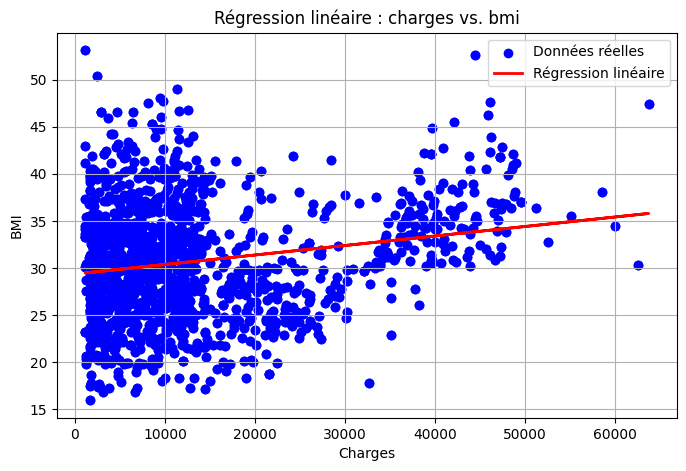

In [7]:
#3 - Etude des données par un modèle de régression linéaire
#Cas Charges VS BMI

X = df[["charges"]]
Y = df["bmi"]
model1 = LinearRegression()
model1.fit(X, Y)
print("Pente (coefficient) :", model1.coef_[0])
print("Ordonnée à l'origine :", model1.intercept_)

Y_1 = model1.coef_[0] * X + model1.intercept_
# Tracé du nuage de points et de la droite de régression
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color="blue", label="Données réelles")
plt.plot(X, Y_1, color="red", linewidth=2, label="Régression linéaire")
plt.title("Régression linéaire : charges vs. bmi")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()

**Observations**:

- premièrement une droite de pente proche de 0, causée par les valeurs élevées de charges (10000 à 60000 pour les charges contre 15 à 50 pour le BMI)

- deuxièmement, les points générés sont trop dispercés autour de la droite de régression. De plus la droite de régression passe par trop peu de points car ils sont trop dispercés.
            
On déduit donc que la relation charges vs BMI qui n'est pas adaptée à une régression linéaire.

Pente (coefficient) : 0.00034623410402384396
Ordonnée à l'origine : 34.525839512146405


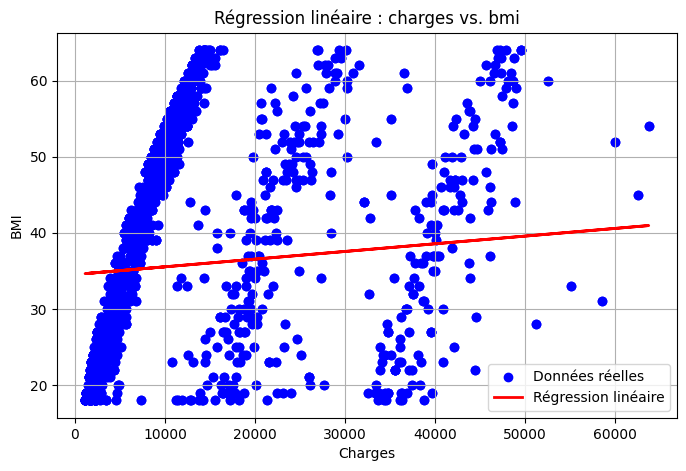

In [8]:
#Cas Charges VS age

X1 = df[["charges"]]
Y1 = df["age"]
model2 = LinearRegression()
model2.fit(X1, Y1)
print("Pente (coefficient) :", model2.coef_[0])
print("Ordonnée à l'origine :", model2.intercept_)

Y_2 = model1.coef_[0] * X1 + model2.intercept_
# Tracé du nuage de points et de la droite de régression
plt.figure(figsize=(8, 5))
plt.scatter(X1, Y1, color="blue", label="Données réelles")
plt.plot(X1, Y_2, color="red", linewidth=2, label="Régression linéaire")
plt.title("Régression linéaire : charges vs. bmi")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()

**Observation**:

- premièrement une droite de pente proche de 0, causée par les valeurs élevées de charges (10000 à 60000 pour les charges contre 20 à 60 pour Age)

- deuxièmement, les points générés sont trop dispercés et ne respectent pas le comportement d'une droite.
            
On déduit donc que la relation charges vs Age n'est pas adaptée à une régression linéaire.

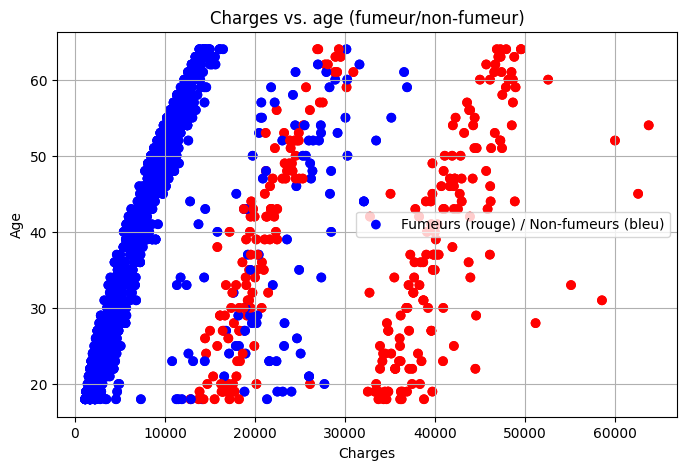

In [9]:
#4 - Analyse par regroupement cathégoriel
#Cas de Charges VS age
X2 = df[["charges"]]
Y2 = df["age"]
colors = ["red" if x == 1.0 else "blue" for x in df["smoker"]]
# Tracé du nuage de points 
plt.figure(figsize=(8, 5))
plt.scatter(X2, Y2, color=colors, label="Fumeurs (rouge) / Non-fumeurs (bleu)")
plt.title("Charges vs. age (fumeur/non-fumeur)")
plt.xlabel("Charges")
plt.ylabel("Age")
plt.legend()
plt.grid(True)
plt.show()

**Observation**:
On constate que les non-fumeurs ont moins de charge que les fumeurs. On observe aussi une augmentation des charges des fumeurs selon l'age.

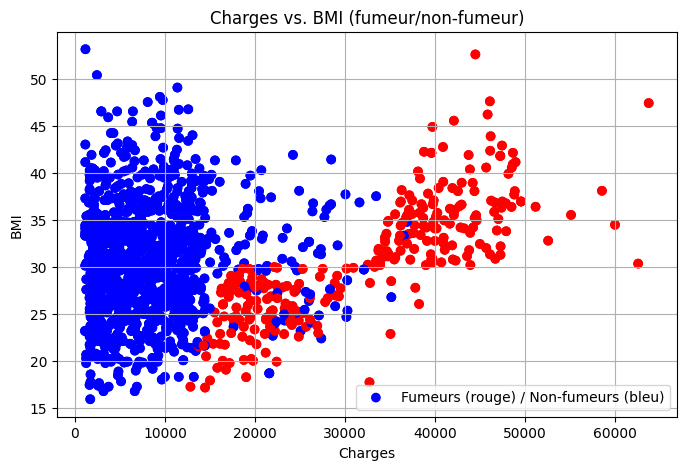

In [10]:
# Cas des Charges VS BMI (fumeur/non-fumeur)

Y3 = df["bmi"]
# Tracé du nuage de points
plt.figure(figsize=(8, 5))
plt.scatter(X2, Y3, color=colors, label="Fumeurs (rouge) / Non-fumeurs (bleu)")
plt.title("Charges vs. BMI (fumeur/non-fumeur)")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()

**Observation**:

On constate que les non-fumeurs ont moins de charge que les fumeurs. On observe aussi une augmentation des charges des fumeurs selon l'age.

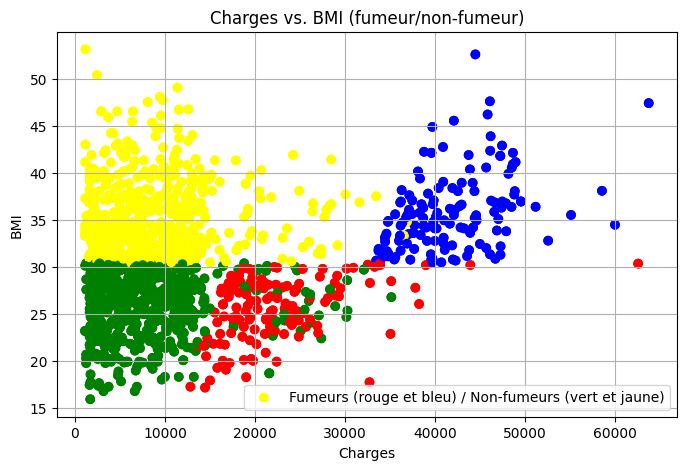

In [11]:
#Cas des Charges VS age VS fumeur VS BMI

Y4 = Y3.median()
colors3 = [
    "red" if df["smoker"][i] == 1.0 and df["bmi"][i] < Y4
    else "blue" if df["smoker"][i] == 1.0 and df["bmi"][i] >= Y4
    else "green" if df["smoker"][i] == 0.0 and df["bmi"][i] < Y4
    else "yellow"
    for i in range(len(df))
]

plt.figure(figsize=(8, 5))
plt.scatter(X2, Y3, color=colors3, label="Fumeurs (rouge et bleu) / Non-fumeurs (vert et jaune)")
plt.title("Charges vs. BMI (fumeur/non-fumeur)")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()

**Obeservations**:

- Le statut de fumeur a un fort impact sur les charges
Visuellement, les fumeurs sont concentrés à droite, dans des zones de charges plus élevées. Les non-fumeurs sont à gauche avec des charges beaucoup plus faibles. Ainsi fumer fait considérablement augmenter les frais médicaux.
- Le BMI accentue cet effet, mais seulement chez les fumeurs
Les fumeurs avec un BMI élevé (points bleus) sont clairement dans la zone de charges extrêmes, chez les non-fumeurs, un BMI élevé n’entraîne pas une hausse aussi forte des charges. Il y a donc un effet combiné “fumeur + BMI élevé” très coûteux.
- Les non-fumeurs sont moins sensibles à la variation de BMI. Que le BMI soit haut ou bas, les non-fumeurs restent dans des zones de charges modérées ou faibles. Le BMI seul n’explique donc pas les charges tant que la personne ne fume pas.

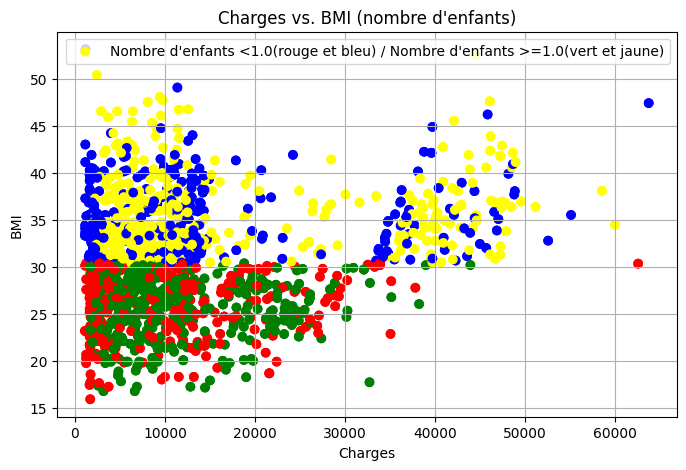

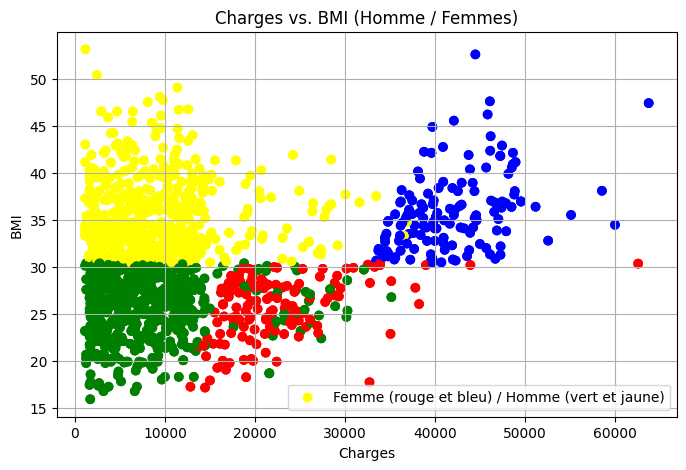

In [12]:
#Cas de charge VS BMI(nombre d'enfants)

Y5 = df["no_of_children"].median()
colors4 = [
    "red" if df["no_of_children"][i] < Y5 and df["bmi"][i] < Y4
    else "blue" if df["no_of_children"][i] < Y5 and df["bmi"][i] >= Y4
    else "green" if df["no_of_children"][i] >= Y5 and df["bmi"][i] < Y4
    else "yellow"
    for i in range(len(df))
]

plt.figure(figsize=(8, 5))
plt.scatter(X2, Y3, color=colors4, label="Nombre d'enfants <" + str(Y5) + "(rouge et bleu) / Nombre d'enfants >=" + str(Y5) + "(vert et jaune)")
plt.title("Charges vs. BMI (nombre d'enfants)")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()

#Cas de charges VS BMI(genre)

colors5 = [
    "red" if df["gender"][i] == 2.0 and df["bmi"][i] < Y4
    else "blue" if df["gender"][i] == 2.0 and df["bmi"][i] >= Y4
    else "green" if df["gender"][i] == 1.0 and df["bmi"][i] < Y4
    else "yellow"
    for i in range(len(df))
]

plt.figure(figsize=(8, 5))
plt.scatter(X2, Y3, color=colors3, label="Femme (rouge et bleu) / Homme (vert et jaune)")
plt.title("Charges vs. BMI (Homme / Femmes)")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()

**Observations**:

Cas Charge VS BMI(nombre d'enfants) 1:
- Les couleurs se chevauchent, l’effet du nombre d’enfants sur les charges est faible.
- BMI élevé implique charges élevées confirmé visuellement, indépendamment du nombre d’enfants.
- Distributions similaires, pas de rupture nette entre les groupes.

Cas Charges VS BMI(Homme/Femme):
- Les femmes avec un BMI élevé (points bleus) ont tendance à avoir des charges médicales beaucoup plus élevées que les hommes de BMI similaire.
- Les hommes, même avec un BMI élevé (jaune), n’atteignent pas les mêmes niveaux de charges que les femmes.
- Il existe une corrélation positive entre BMI et charges, surtout marquée chez les femmes.
- La dispersion plus large chez les femmes suggère une plus grande variabilité des charges pour un même BMI.

<center> CONCLUSION GENERALE </center>

L’analyse exploratoire menée sur la base de données Medical Insurance a permis de mieux comprendre les facteurs influençant les charges annuelles d’assurance santé. Après un nettoyage rigoureux des données (remplissage des valeurs manquantes, typage), plusieurs approches statistiques ont été appliquées :

- Une corrélation élevée a été observée entre le statut de fumeur et le montant des charges, ce qui confirme l'impact direct du tabagisme sur le coût des assurances.

- Les tentatives de modélisation par régression linéaire entre les charges et d'autres variables continues (BMI, âge) n’ont pas montré de lien linéaire pertinent, en raison d’une forte dispersion des données.

- L’analyse par regroupement catégoriel a mis en lumière certaines tendances utiles, notamment des variations de charges selon le genre, la région, ou le nombre d’enfants à charge.

Ces résultats soulignent l’importance du statut de fumeur comme critère clé de tarification, tandis que les autres variables semblent influencer les charges de manière plus complexe ou non linéaire.
Cette étude offre ainsi des pistes solides pour affiner la politique de tarification et identifier des leviers de prévention ciblés.
                                